In [1]:
#import libraries
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

In [2]:
#import data
data = pd.read_csv('C:/Users/desum/OneDrive/Desktop/Sem_1/DS/Project/Chicago_Crime.csv')
print('File Read Succesfully')

File Read Succesfully


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048575 entries, 0 to 1048574
Data columns (total 22 columns):
 #   Column                Non-Null Count    Dtype  
---  ------                --------------    -----  
 0   ID                    1048575 non-null  int64  
 1   Case Number           1048575 non-null  object 
 2   Date                  1048575 non-null  object 
 3   Block                 1048575 non-null  object 
 4   IUCR                  1048575 non-null  object 
 5   Primary Type          1048575 non-null  object 
 6   Description           1048575 non-null  object 
 7   Location Description  1045453 non-null  object 
 8   Arrest                1048575 non-null  bool   
 9   Domestic              1048575 non-null  bool   
 10  Beat                  1048575 non-null  int64  
 11  District              1048574 non-null  float64
 12  Ward                  1022186 non-null  float64
 13  Community Area        1022298 non-null  float64
 14  FBI Code              1048575 non-

In [19]:
#suming the null values in the dataset
data.isnull().sum()

ID                      0
Case Number             0
Date                    0
Block                   0
IUCR                    0
Primary Type            0
Description             0
Location Description    0
Arrest                  0
Domestic                0
Beat                    0
District                0
Ward                    0
Community Area          0
FBI Code                0
X Coordinate            0
Y Coordinate            0
Year                    0
Updated On              0
Latitude                0
Longitude               0
Location                0
dtype: int64

<AxesSubplot:>

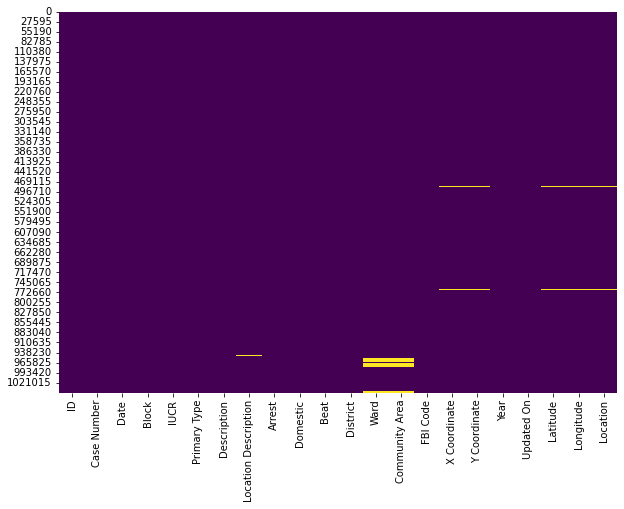

In [7]:
#HeatMap
plt.figure(figsize=(10,7))
sns.heatmap(data.isnull(),cbar =False, cmap = 'viridis')

In [8]:
#droping the null columns
data = data.dropna()

In [11]:
#checking the null values
data.isnull().sum()

ID                      0
Case Number             0
Date                    0
Block                   0
IUCR                    0
Primary Type            0
Description             0
Location Description    0
Arrest                  0
Domestic                0
Beat                    0
District                0
Ward                    0
Community Area          0
FBI Code                0
X Coordinate            0
Y Coordinate            0
Year                    0
Updated On              0
Latitude                0
Longitude               0
Location                0
dtype: int64

In [10]:
data.head()

,ID,Case Number,Date,Block,IUCR,Primary Type,Description,Location Description,Arrest,Domestic,...,Ward,Community Area,FBI Code,X Coordinate,Y Coordinate,Year,Updated On,Latitude,Longitude,Location
0,10224738,HY411648,09-05-2015 13:30,043XX S WOOD ST,486,BATTERY,DOMESTIC BATTERY SIMPLE,RESIDENCE,False,True,...,12.0,61.0,08B,1165074.0,1875917.0,2015,02-10-2018 15:50,41.815117,-87.670000,"(41.815117282, -87.669999562)"
1,10224739,HY411615,09-04-2015 11:30,008XX N CENTRAL AVE,870,THEFT,POCKET-PICKING,CTA BUS,False,False,...,29.0,25.0,6,1138875.0,1904869.0,2015,02-10-2018 15:50,41.895080,-87.765400,"(41.895080471, -87.765400451)"
3,10224740,HY411595,09-05-2015 12:45,035XX W BARRY AVE,2023,NARCOTICS,POSS: HEROIN(BRN/TAN),SIDEWALK,True,False,...,35.0,21.0,18,1152037.0,1920384.0,2015,02-10-2018 15:50,41.937406,-87.716650,"(41.937405765, -87.716649687)"
4,10224741,HY411610,09-05-2015 13:00,0000X N LARAMIE AVE,560,ASSAULT,SIMPLE,APARTMENT,False,True,...,28.0,25.0,08A,1141706.0,1900086.0,2015,02-10-2018 15:50,41.881903,-87.755121,"(41.881903443, -87.755121152)"
5,10224742,HY411435,09-05-2015 10:55,082XX S LOOMIS BLVD,610,BURGLARY,FORCIBLE ENTRY,RESIDENCE,False,False,...,21.0,71.0,5,1168430.0,1850165.0,2015,02-10-2018 15:50,41.744379,-87.658431,"(41.744378879, -87.658430635)"


In [4]:
def plot_counts(serie, title):
    df = pd.DataFrame(serie.value_counts()[:15])
    df.columns = ["Freq"]
    df["Type"] = df.index
    fig = px.bar(df, y="Freq", x="Type", text="Freq", color="Freq", color_continuous_scale=px.colors.sequential.OrRd)
    fig.update_traces(texttemplate="%{text:.2s}", textposition="outside")
    #fig.update_layout(uniformtext_minsize=8, uniformtext_mode="hide")
    fig.update_layout(title_text=title)
    fig.show()


In [9]:
#Converting argument to datetime
data['Date']=pd.to_datetime(data['Date']).dt.date
data['Updated On']=pd.to_datetime(data['Updated On']).dt.date

In [10]:
data.tail()

,ID,Case Number,Date,Block,IUCR,Primary Type,Description,Location Description,Arrest,Domestic,...,Ward,Community Area,FBI Code,X Coordinate,Y Coordinate,Year,Updated On,Latitude,Longitude,Location
1048570,1317995,G009210,2001-01-05,012XX S CANAL ST,810,THEFT,OVER $500,OTHER,False,False,...,NaN,NaN,6,1173280.0,1894435.0,2001,2015-08-17,41.865754,-87.639350,"(41.865754449, -87.639349952)"
1048571,1317996,G009842,2001-01-05,033XX N CENTRAL AV,1320,CRIMINAL DAMAGE,TO VEHICLE,STREET,False,False,...,NaN,NaN,14,1138471.0,1921924.0,2001,2015-08-17,41.941889,-87.766470,"(41.941888646, -87.766470221)"
1048572,1317997,G009844,2001-01-05,026XX W NORTH AV,820,THEFT,$500 AND UNDER,STREET,False,False,...,NaN,NaN,6,1158333.0,1910574.0,2001,2015-08-17,41.910360,-87.693780,"(41.910359793, -87.693779661)"
1048573,11871103,JC484951,2019-10-24,008XX N MICHIGAN AVE,890,THEFT,FROM BUILDING,RESTAURANT,False,False,...,2.0,8.0,6,1177338.0,1906181.0,2019,2019-10-31,41.897895,-87.624097,"(41.897895128, -87.624096605)"
1048574,2140615,HH365850,2002-05-11,015XX N THROOP ST,1506,PROSTITUTION,SOLICIT ON PUBLIC WAY,STREET,True,False,...,32.0,24.0,16,NaN,NaN,2002,2015-08-17,NaN,NaN,NaN


In [15]:
data.index= pd.DatetimeIndex(data.Date)
data.index = pd.to_datetime(data.index)

In [20]:
#Categorical are a pandas data type that corresponds to the categorical variables in statistics. Such variables take 
#on a fixed and limited number of possible values. For examples – grades, gender, blood group type etc. 

data['Primary Type'] = pd.Categorical(data['Primary Type'])
data['Description'] = pd.Categorical(data['Description'])
data['Location Description'] = pd.Categorical(data['Location Description'])

In [11]:
data['Primary Type']

0                  BATTERY
1                    THEFT
2                    THEFT
3                NARCOTICS
4                  ASSAULT
                ...       
1048570              THEFT
1048571    CRIMINAL DAMAGE
1048572              THEFT
1048573              THEFT
1048574       PROSTITUTION
Name: Primary Type, Length: 1048575, dtype: object

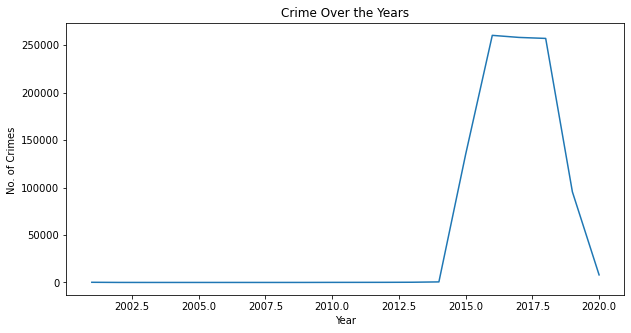

In [22]:
#plotting the progress of crimes over years
plt.figure(figsize = (10,5))
data.groupby([data.index.year]).size().plot.line()
plt.title('Crime Over the Years')
plt.xlabel('Year')
plt.ylabel('No. of Crimes ')
plt.show()

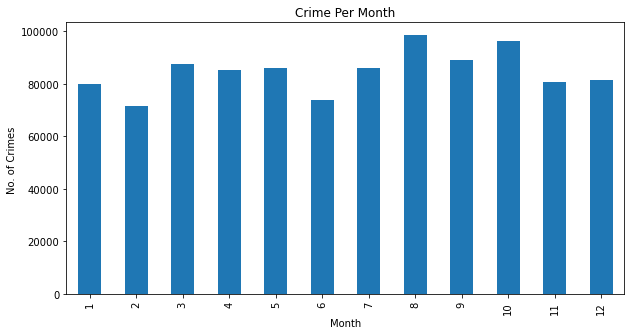

In [23]:
#Plotting crimes happen in a month
plt.figure(figsize = (10,5))
data.groupby([data.index.month]).size().plot.bar()
plt.title('Crime Per Month')
plt.xlabel('Month')
plt.ylabel('No. of Crimes ')
plt.show()

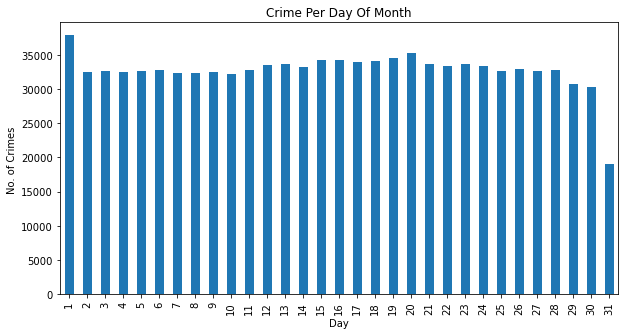

In [24]:
#Crimes happening on a day in a year
plt.figure(figsize = (10,5))
data.groupby([data.index.day]).size().plot.bar()
plt.title('Crime Per Day Of Month')
plt.xlabel('Day')
plt.ylabel('No. of Crimes ')
plt.show()

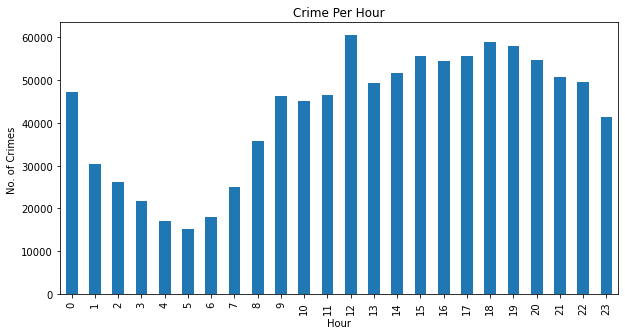

In [25]:
#Crimes happening on an average hour
plt.figure(figsize = (10,5))
data.groupby([data.index.hour]).size().plot.bar()
plt.title('Crime Per Hour')
plt.xlabel('Hour')
plt.ylabel('No. of Crimes ')
# %matplotlib qt                   
plt.show()

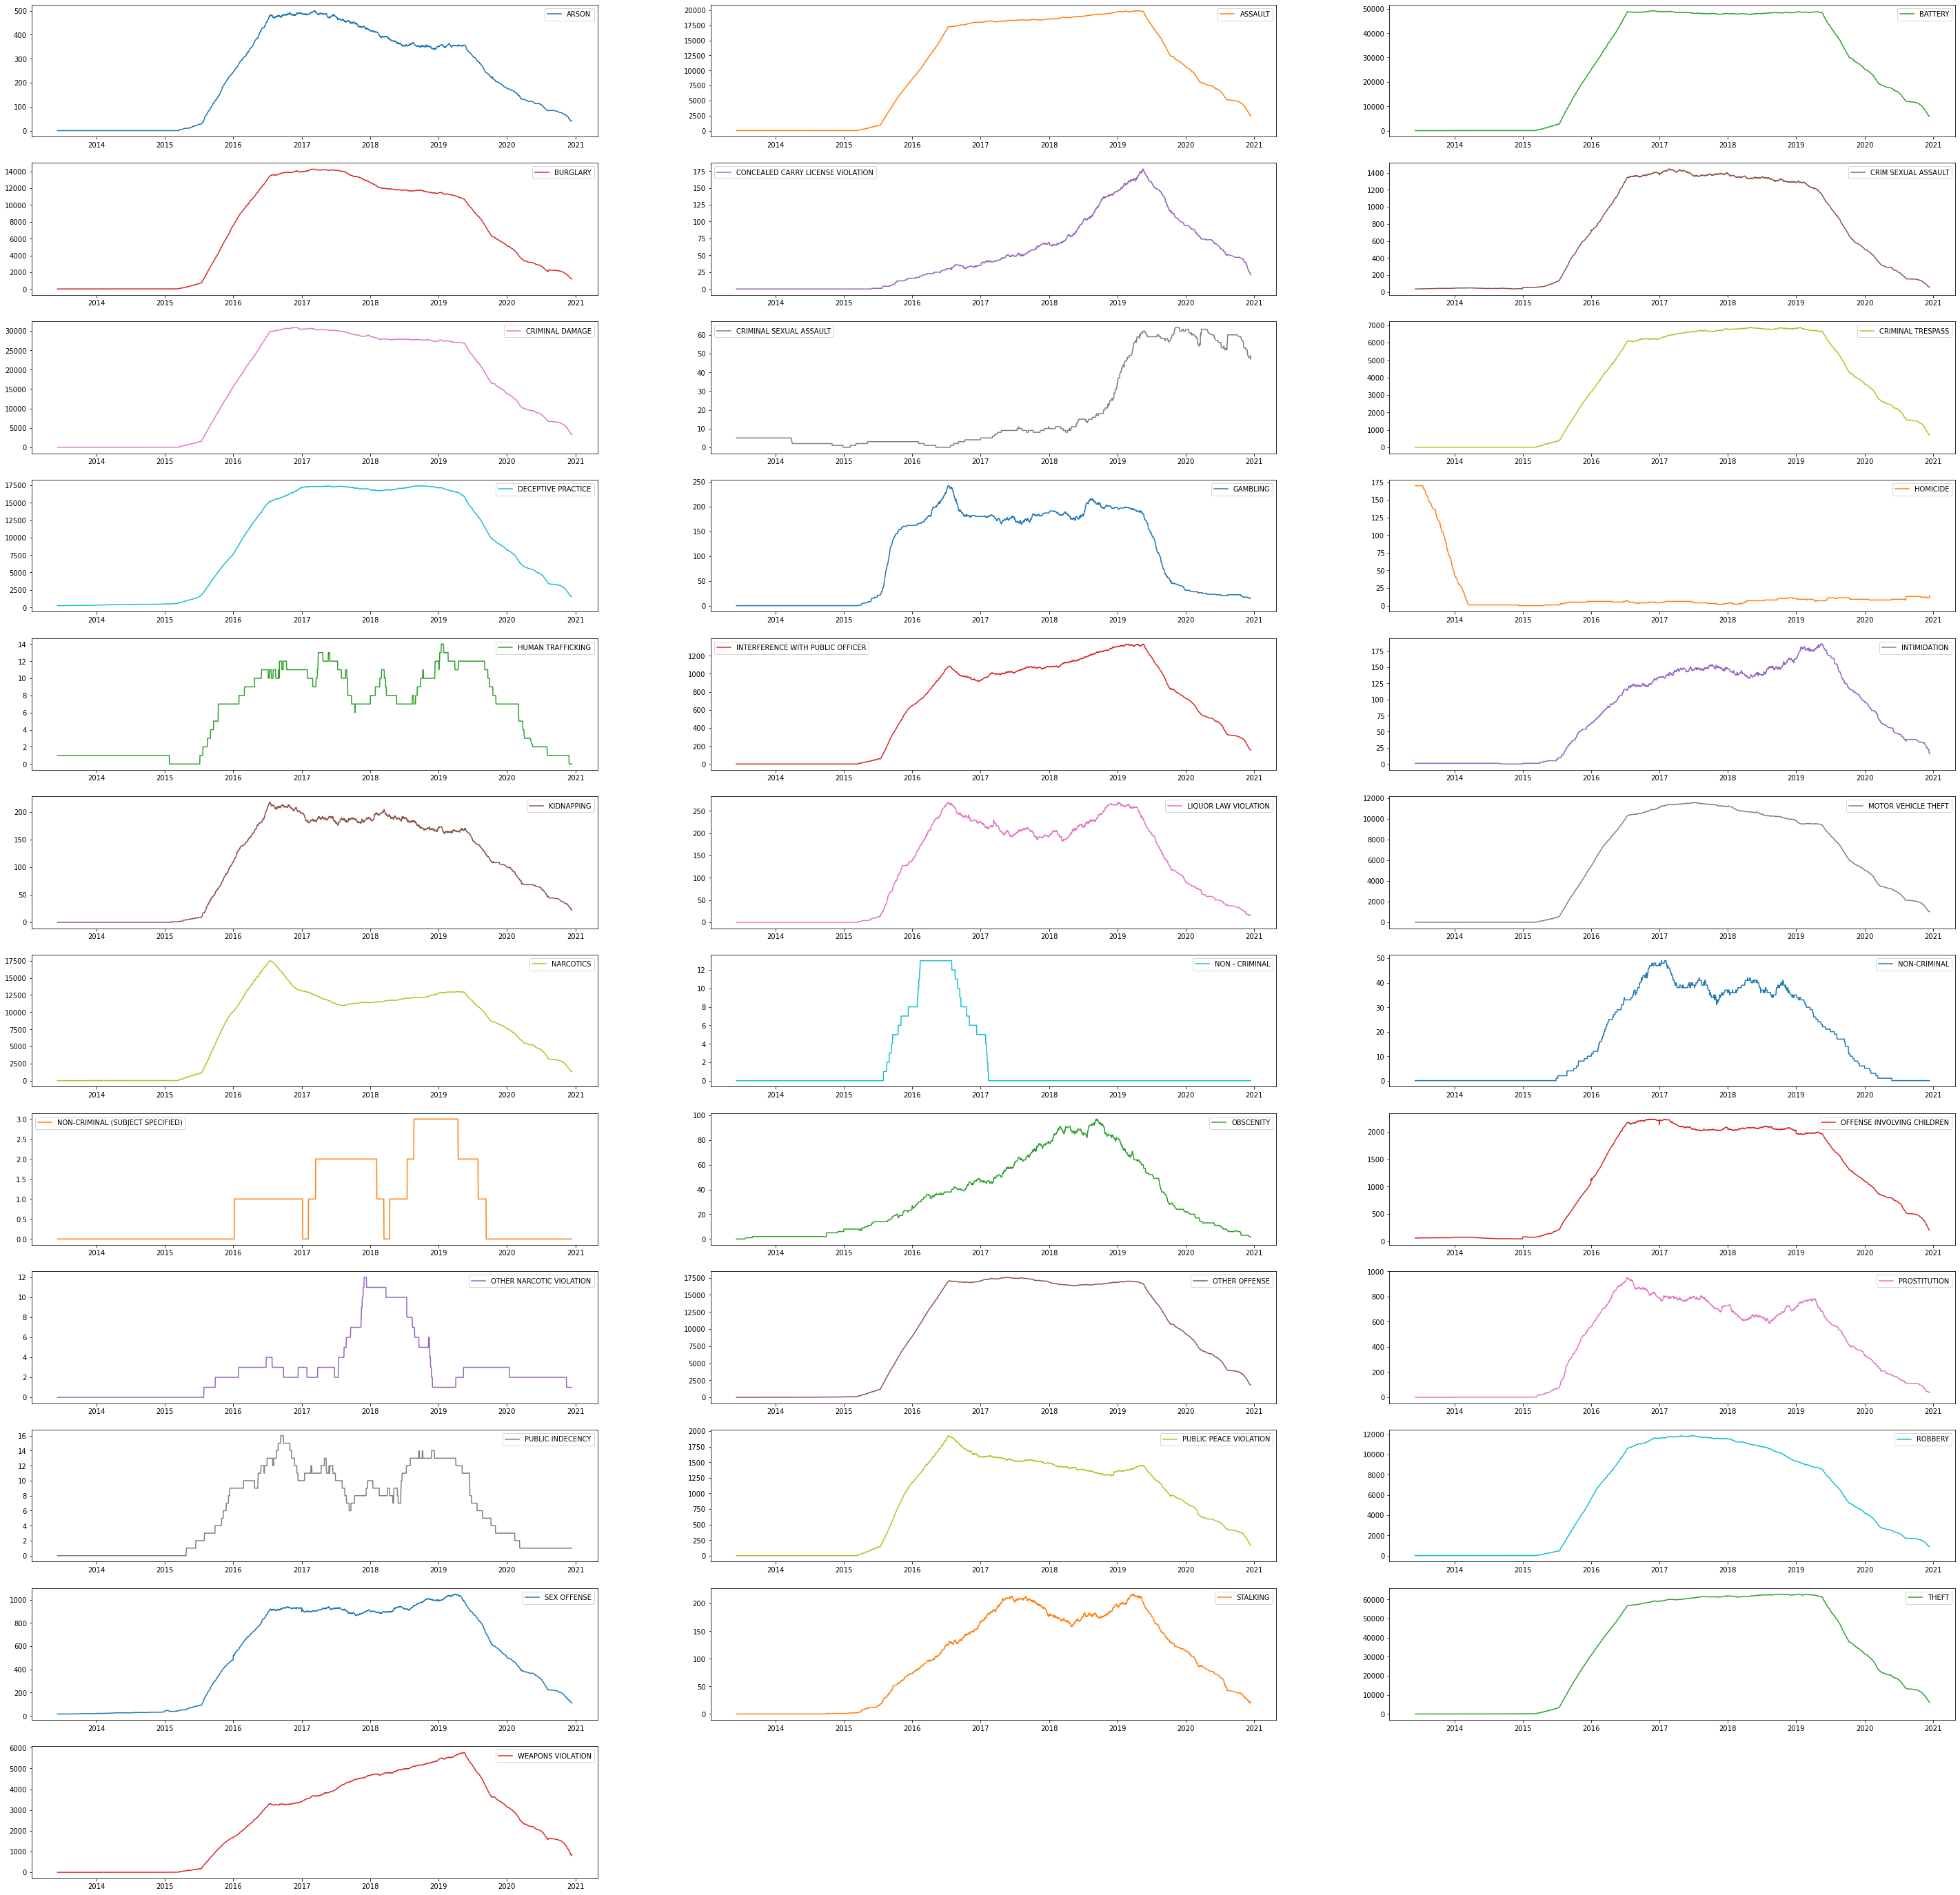

In [26]:
#Overall graph for each type of crime and its graph over years
crimes_count_date = data.pivot_table('ID', aggfunc=np.size, columns='Primary Type', index=data.index.date, fill_value=0)
crimes_count_date.index = pd.DatetimeIndex(crimes_count_date.index)
plo = crimes_count_date.rolling(365).sum().plot(figsize=(50, 50), subplots=True, layout=(-1, 3), sharex=False, sharey=False)
# %matplotlib qt                  

In [6]:
from sklearn.model_selection import train_test_split

training_data, testing_data = train_test_split(data, test_size=0.2, random_state=25)

print(f"No. of training examples: {training_data.shape[0]}")
print(f"No. of testing examples: {testing_data.shape[0]}")

No. of training examples: 838860
No. of testing examples: 209715


In [12]:
print(training_data)

              ID Case Number        Date                 Block  IUCR  \
779808  11310560    JB257459  2018-05-10  032XX W BALMORAL AVE   810   
147160  10400424    HZ137402  2016-02-02   023XX N LARAMIE AVE   486   
334106  10023999    HY213518  2015-04-07      001XX N STATE ST   860   
459216  10906290    JA218833  2017-04-09   019XX N KEDVALE AVE   560   
189396  10475387    HZ214612  2016-04-05  046XX W DIVERSEY AVE   560   
...          ...         ...         ...                   ...   ...   
130365  10370569    HZ106593  2016-01-06     065XX S ELLIS AVE   620   
616591  11102670    JA450728  2017-09-28  026XX W LAWRENCE AVE  4386   
6618    10233993    HY422256  2015-09-13     084XX S THROOP ST  143A   
90430   10198903    HY386668  2015-08-17    093XX S HALSTED ST   320   
29828   10273433    HY461195  2015-10-14    023XX S ALBANY AVE   880   

             Primary Type                          Description  \
779808              THEFT                            OVER $500   
147

In [13]:
training_data.head()

,ID,Case Number,Date,Block,IUCR,Primary Type,Description,Location Description,Arrest,Domestic,...,Ward,Community Area,FBI Code,X Coordinate,Y Coordinate,Year,Updated On,Latitude,Longitude,Location
779808,11310560,JB257459,2018-05-10,032XX W BALMORAL AVE,810,THEFT,OVER $500,APARTMENT,False,True,...,40.0,13.0,6,1153986.0,1935709.0,2018,05/17/2018 03:53:33 PM,41.979420,-87.709076,"(41.979419868, -87.709076452)"
147160,10400424,HZ137402,2016-02-02,023XX N LARAMIE AVE,486,BATTERY,DOMESTIC BATTERY SIMPLE,APARTMENT,False,True,...,37.0,19.0,08B,1141332.0,1915229.0,2016,02-10-2018 15:50,41.923464,-87.756120,"(41.923464491, -87.756120351)"
334106,10023999,HY213518,2015-04-07,001XX N STATE ST,860,THEFT,RETAIL THEFT,DEPARTMENT STORE,False,False,...,42.0,32.0,6,1176352.0,1900927.0,2015,08/17/2015 03:03:40 PM,41.883500,-87.627877,"(41.883500187, -87.627876698)"
459216,10906290,JA218833,2017-04-09,019XX N KEDVALE AVE,560,ASSAULT,SIMPLE,ALLEY,False,False,...,30.0,20.0,08A,1148412.0,1912474.0,2017,02-10-2018 15:50,41.915771,-87.730177,"(41.915770788, -87.730176766)"
189396,10475387,HZ214612,2016-04-05,046XX W DIVERSEY AVE,560,ASSAULT,SIMPLE,DEPARTMENT STORE,False,False,...,31.0,20.0,08A,1144951.0,1918212.0,2016,02-10-2018 15:50,41.931583,-87.742747,"(41.931582515, -87.742747165)"


In [14]:
training = training_data.to_numpy()

In [15]:
training

array([[11310560, 'JB257459', datetime.date(2018, 5, 10), ...,
        41.97941987, -87.70907645, '(41.979419868, -87.709076452)'],
       [10400424, 'HZ137402', datetime.date(2016, 2, 2), ...,
        41.92346449, -87.75612035, '(41.923464491, -87.756120351)'],
       [10023999, 'HY213518', datetime.date(2015, 4, 7), ...,
        41.88350019, -87.6278767, '(41.883500187, -87.627876698)'],
       ...,
       [10233993, 'HY422256', datetime.date(2015, 9, 13), ...,
        41.74084856, -87.65590637, '(41.740848563, -87.655906366)'],
       [10198903, 'HY386668', datetime.date(2015, 8, 17), ...,
        41.72452719, -87.64329688, '(41.724527193, -87.643296878)'],
       [10273433, 'HY461195', datetime.date(2015, 10, 14), ...,
        41.84938272, -87.70273008, '(41.849382719, -87.702730075)']],
      dtype=object)